In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir = "./_Data/"
train_data = "train_final.csv"
data_desc = "data-desc.txt"

data = pd.read_csv(dir+train_data)

In [2]:
continuous_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

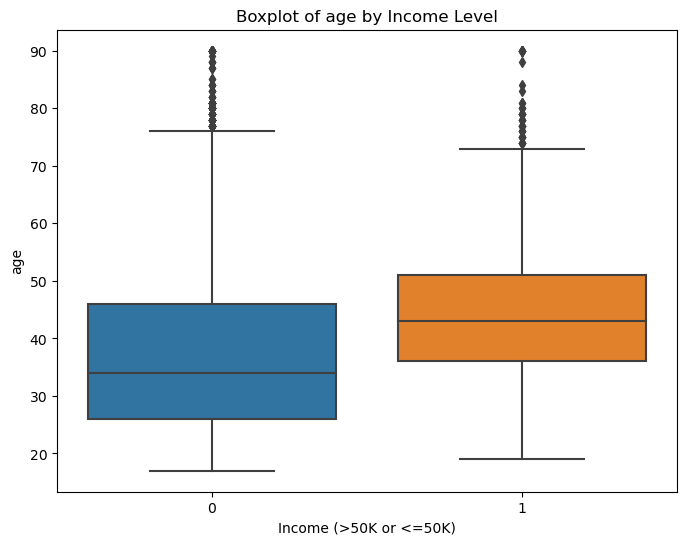

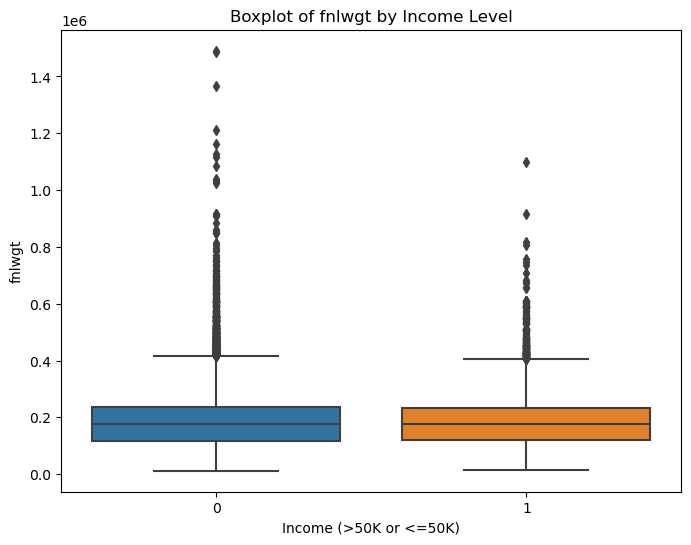

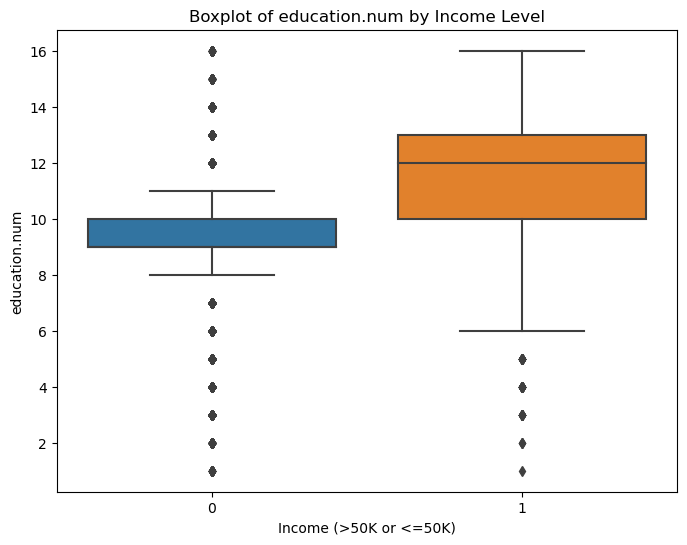

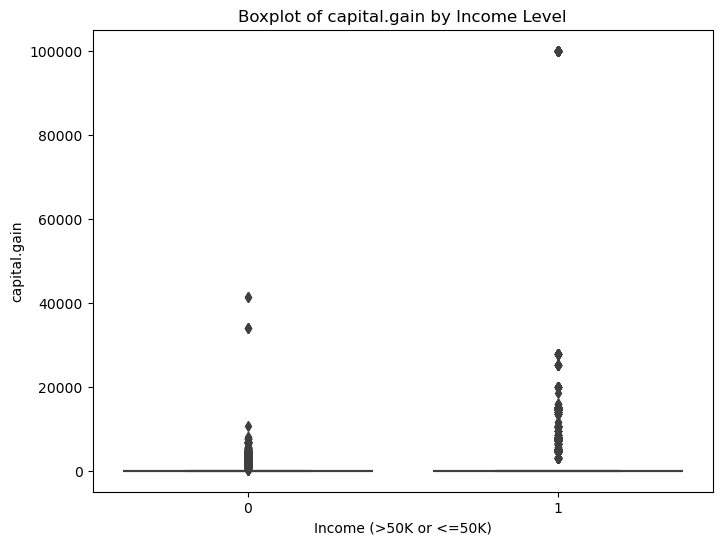

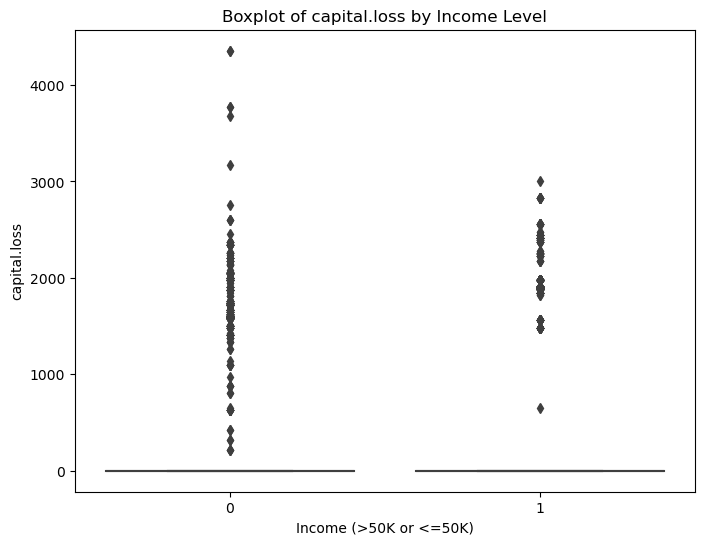

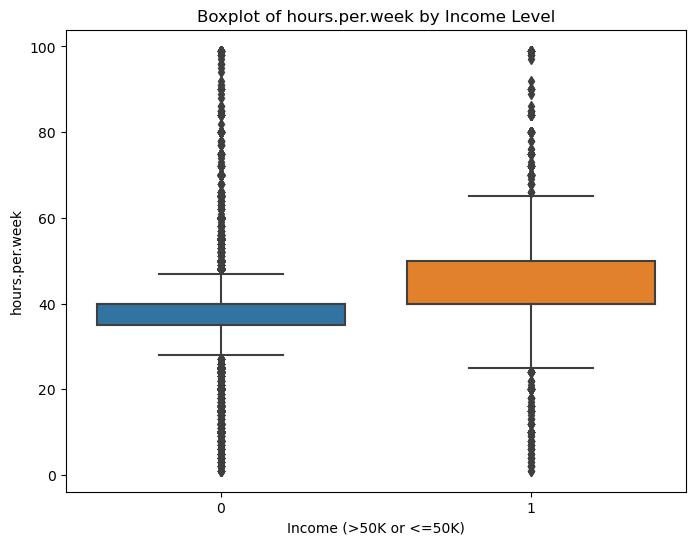

In [3]:
def draw_boxplot(feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='income>50K', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Income Level')
    plt.xlabel('Income (>50K or <=50K)')
    plt.ylabel(feature)
    plt.show()

for feature in continuous_features:
    draw_boxplot(feature)


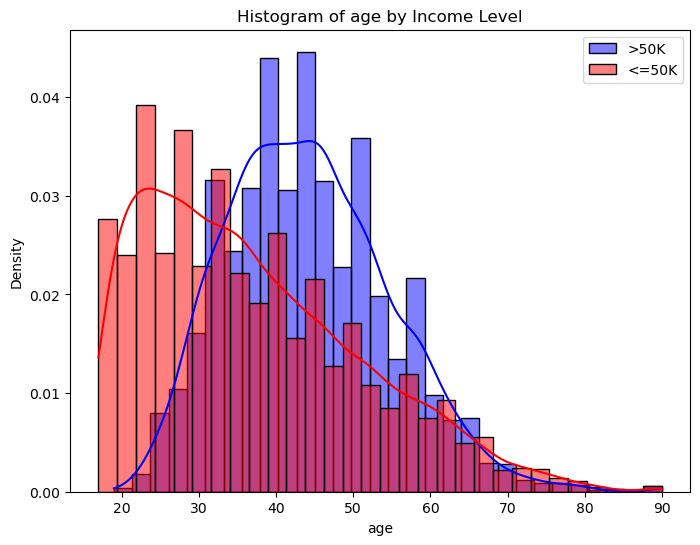

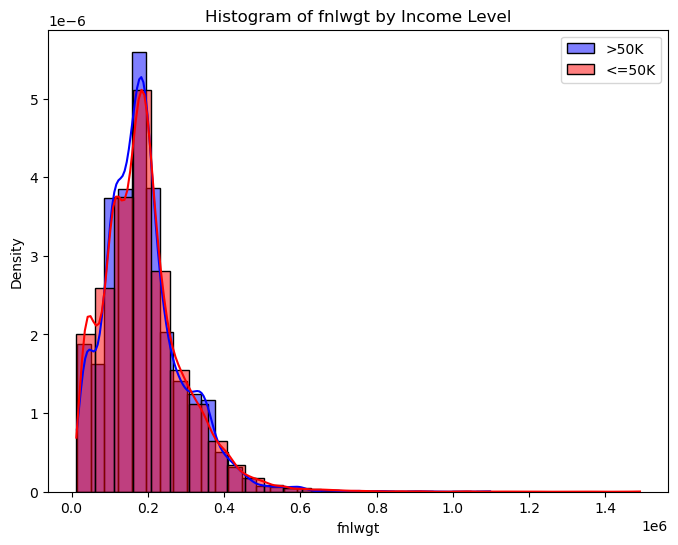

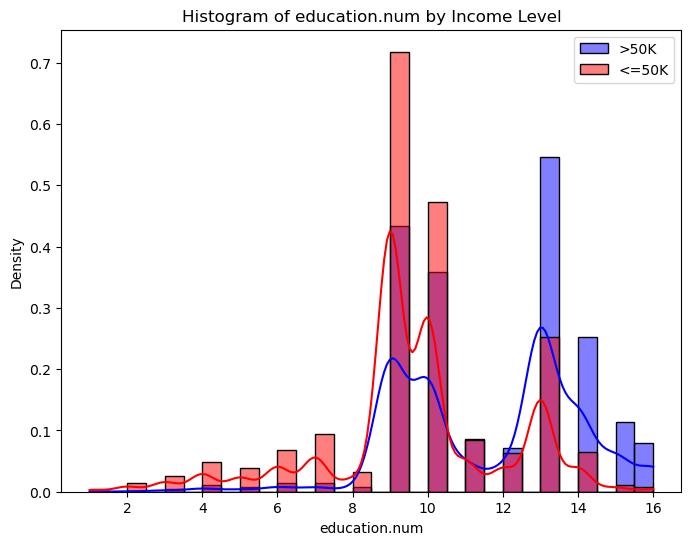

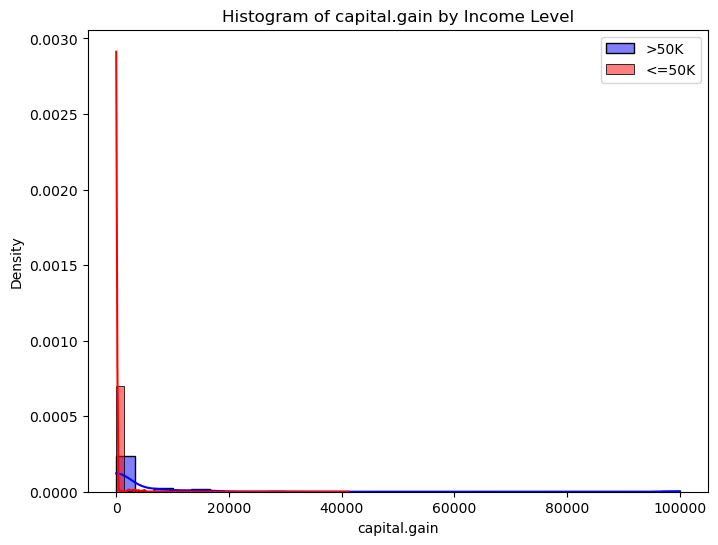

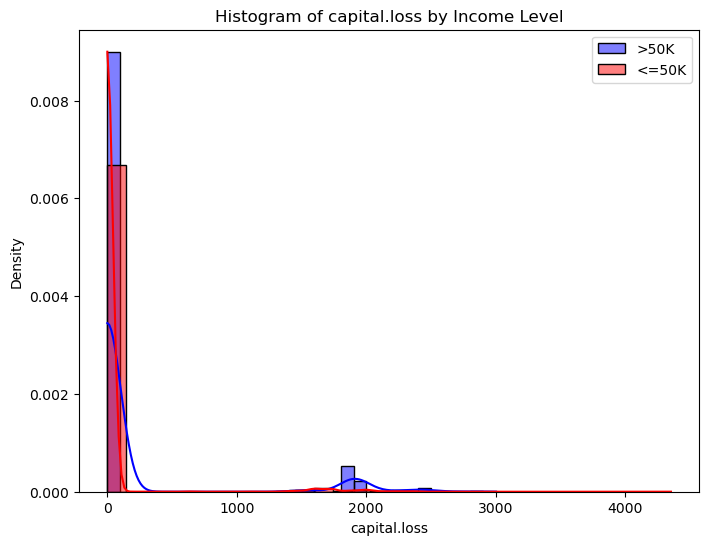

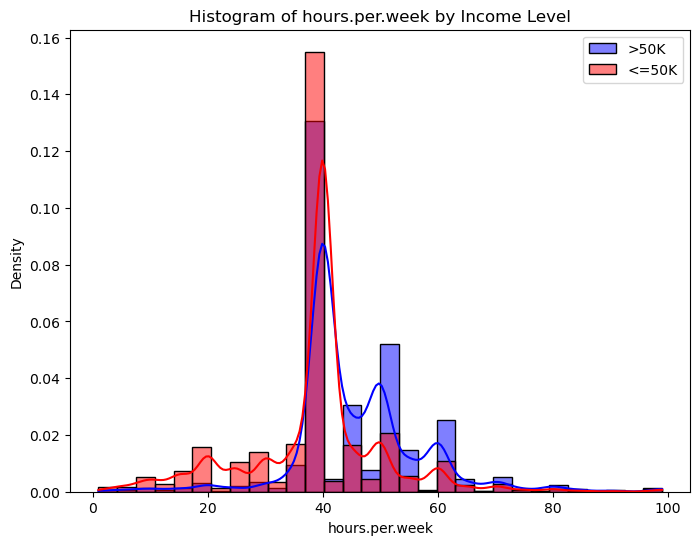

In [4]:
def draw_histogram(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[data['income>50K'] == 1][feature], color='blue', label='>50K', kde=True, stat='density', bins=30)
    sns.histplot(data[data['income>50K'] == 0][feature], color='red', label='<=50K', kde=True, stat='density', bins=30)
    plt.title(f'Histogram of {feature} by Income Level')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

for feature in continuous_features:
    draw_histogram(feature)


In [5]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

def create_pivot_table(feature):
    pivot = data.pivot_table(values='income>50K', index=feature, aggfunc='mean')
    pivot = pivot.sort_values(by='income>50K', ascending=False)
    return pivot

for feature in categorical_features:
    pivot_table = create_pivot_table(feature)
    print(f"\nPivot Table for {feature}:\n", pivot_table)



Pivot Table for workclass:
                   income>50K
workclass                   
Self-emp-inc        0.566864
Federal-gov         0.383562
Local-gov           0.291280
Self-emp-not-inc    0.280081
State-gov           0.265188
Private             0.220351
?                   0.094642
Without-pay         0.066667
Never-worked        0.000000

Pivot Table for education:
               income>50K
education               
Doctorate       0.771987
Prof-school     0.755556
Masters         0.555150
Bachelors       0.405786
Assoc-acdm      0.263547
Assoc-voc       0.247393
Some-college    0.193323
HS-grad         0.160611
12th            0.075075
10th            0.065312
7th-8th         0.063136
9th             0.054545
5th-6th         0.050000
11th            0.045989
Preschool       0.022727
1st-4th         0.022059

Pivot Table for marital.status:
                        income>50K
marital.status                   
Married-civ-spouse       0.445513
Married-AF-spouse        0.370370
Div

In [6]:
def create_crosstab(feature):
    crosstab = pd.crosstab(index=data[feature], columns=data['income>50K'], normalize='index')
    crosstab.columns = ['<=50K', '>50K'] 
    return crosstab

for feature in categorical_features:
    crosstab_table = create_crosstab(feature)
    print(f"\nCrosstab for {feature}:\n", crosstab_table)



Crosstab for workclass:
                      <=50K      >50K
workclass                           
?                 0.905358  0.094642
Federal-gov       0.616438  0.383562
Local-gov         0.708720  0.291280
Never-worked      1.000000  0.000000
Private           0.779649  0.220351
Self-emp-inc      0.433136  0.566864
Self-emp-not-inc  0.719919  0.280081
State-gov         0.734812  0.265188
Without-pay       0.933333  0.066667

Crosstab for education:
                  <=50K      >50K
education                       
10th          0.934688  0.065312
11th          0.954011  0.045989
12th          0.924925  0.075075
1st-4th       0.977941  0.022059
5th-6th       0.950000  0.050000
7th-8th       0.936864  0.063136
9th           0.945455  0.054545
Assoc-acdm    0.736453  0.263547
Assoc-voc     0.752607  0.247393
Bachelors     0.594214  0.405786
Doctorate     0.228013  0.771987
HS-grad       0.839389  0.160611
Masters       0.444850  0.555150
Preschool     0.977273  0.022727
Prof-school  

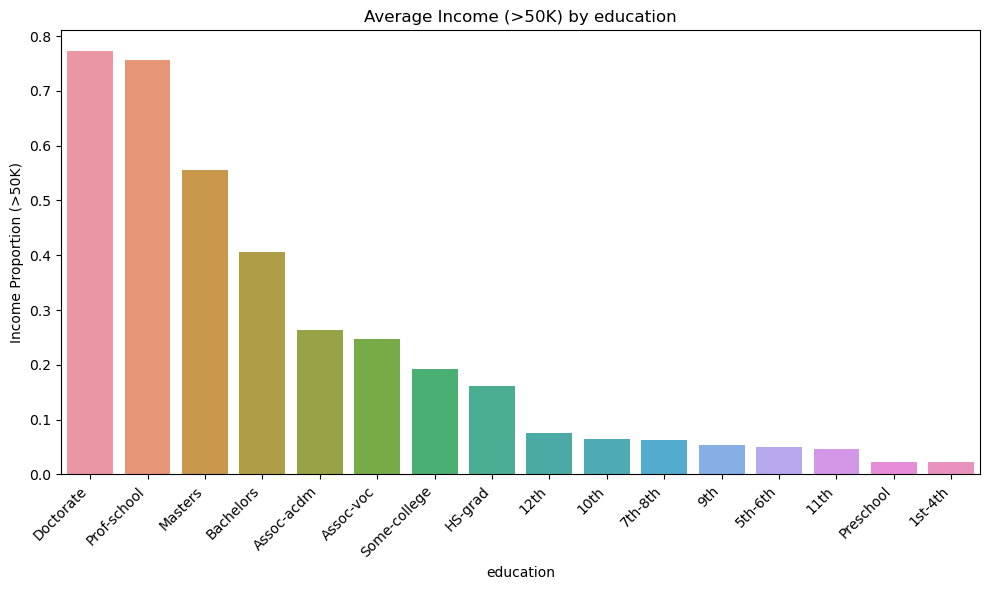

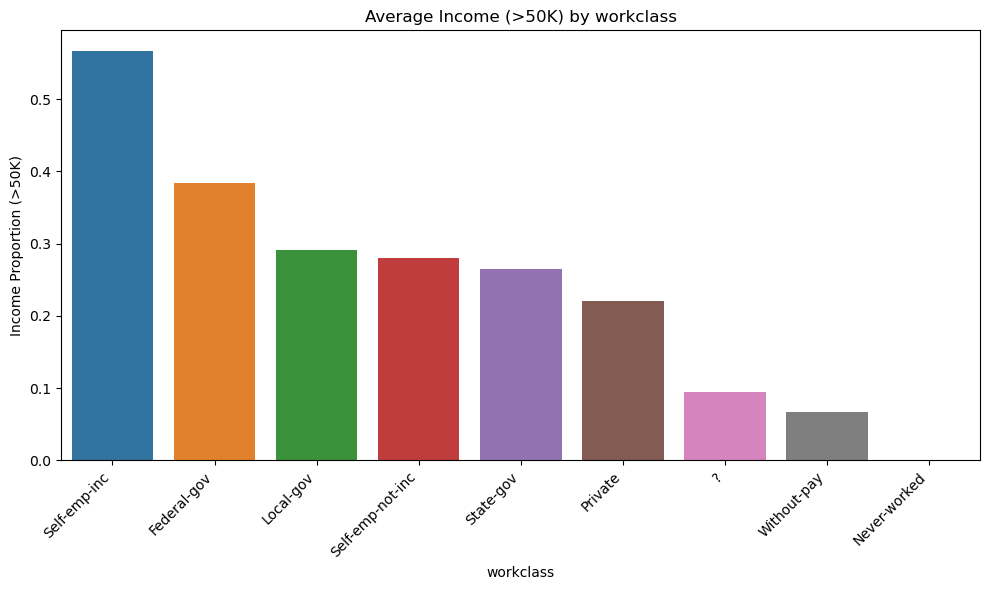

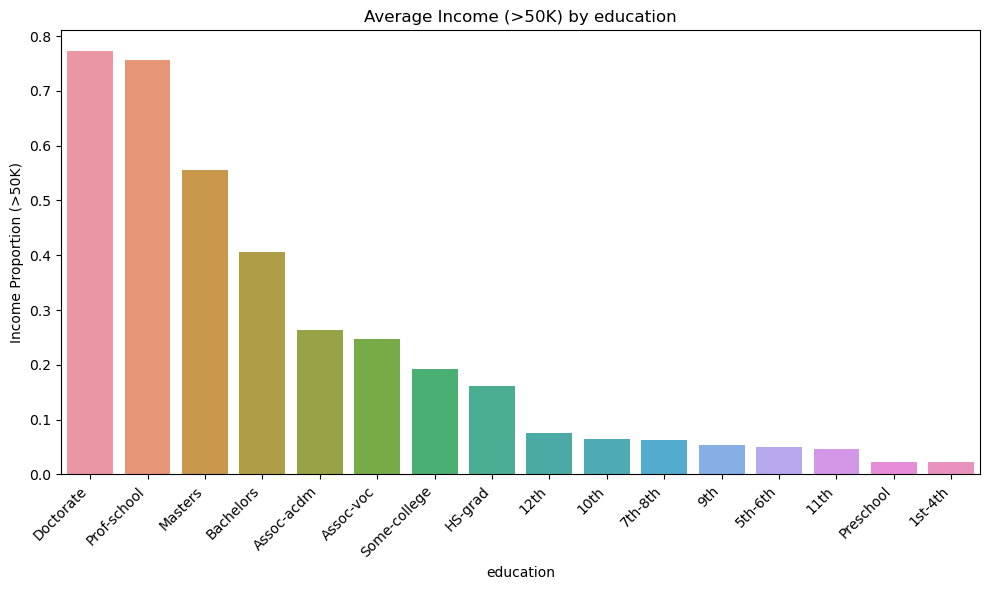

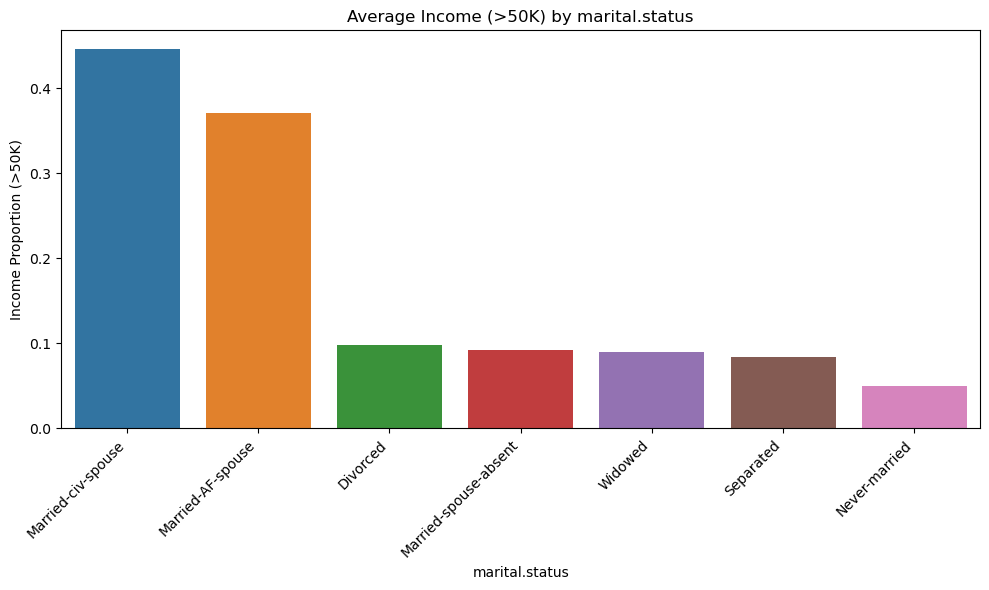

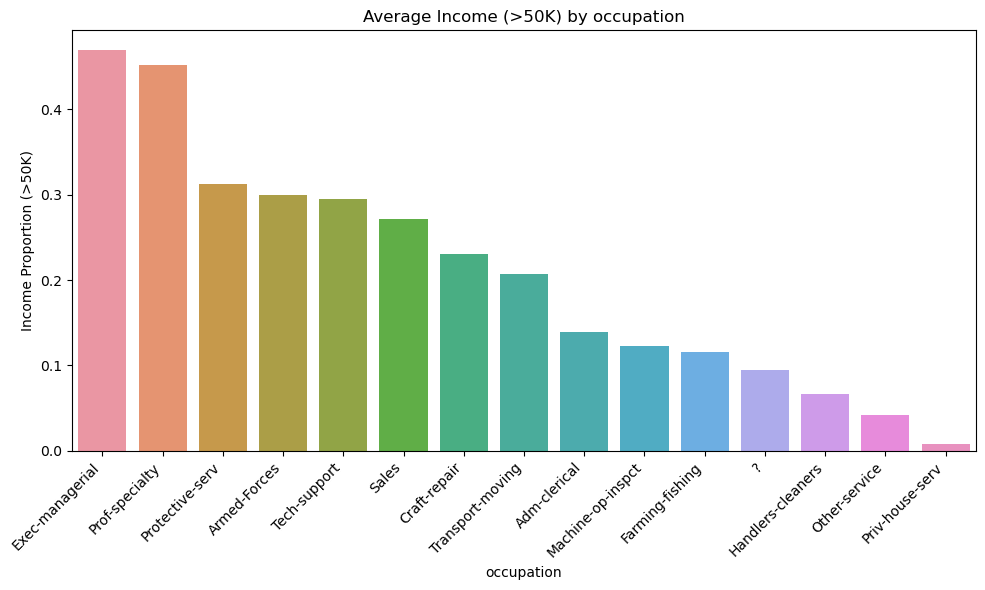

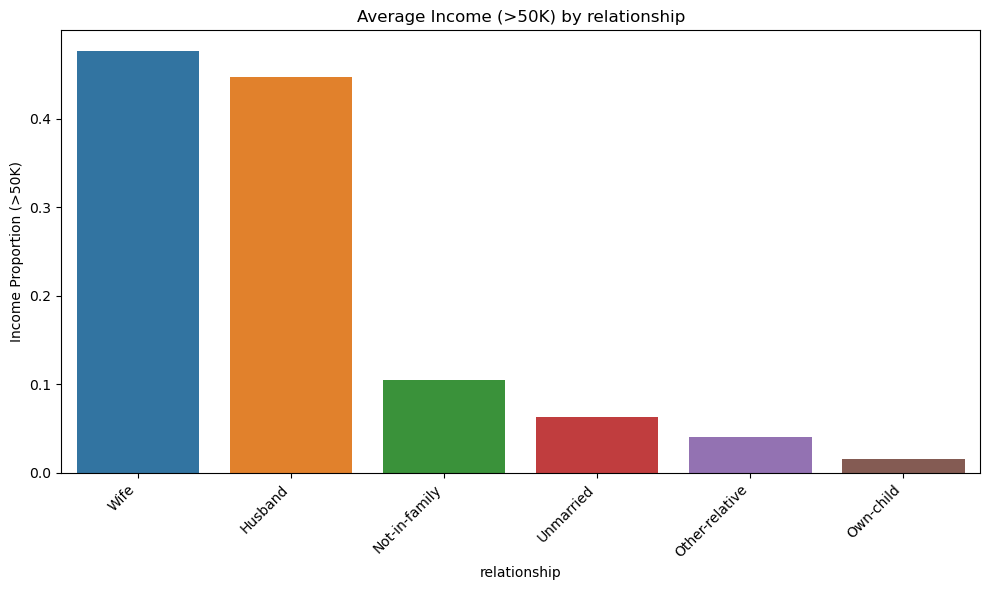

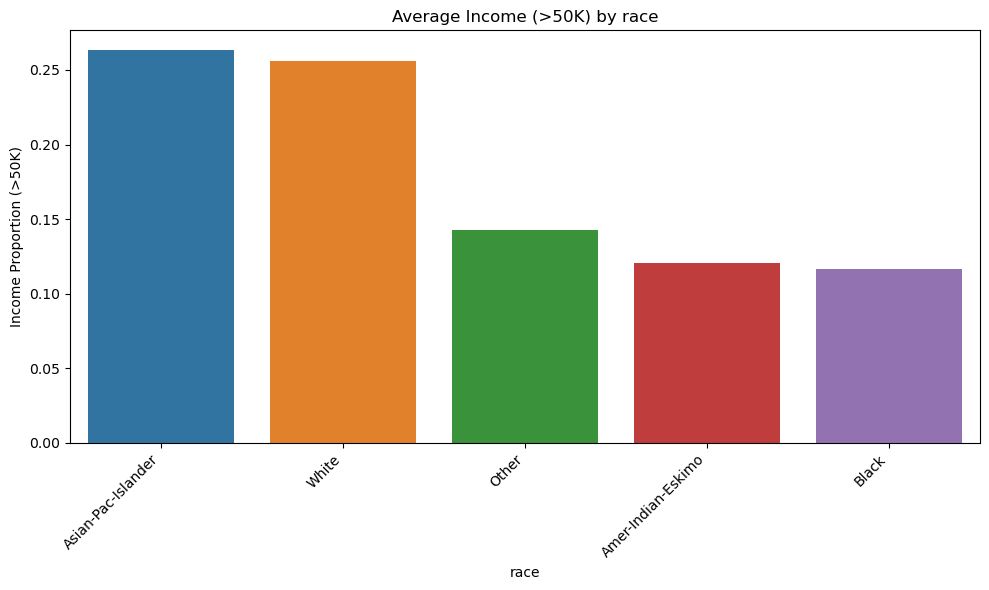

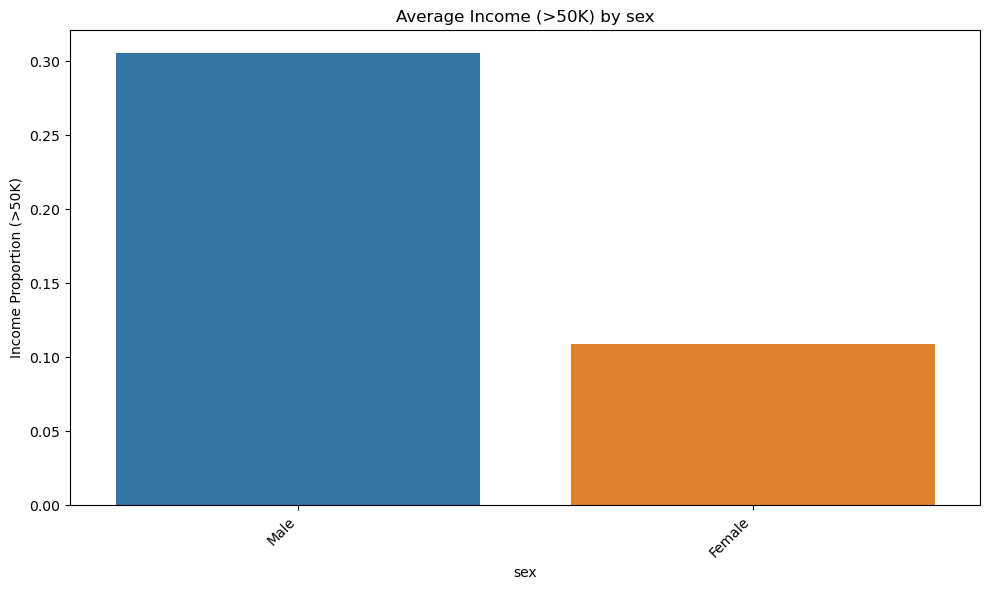

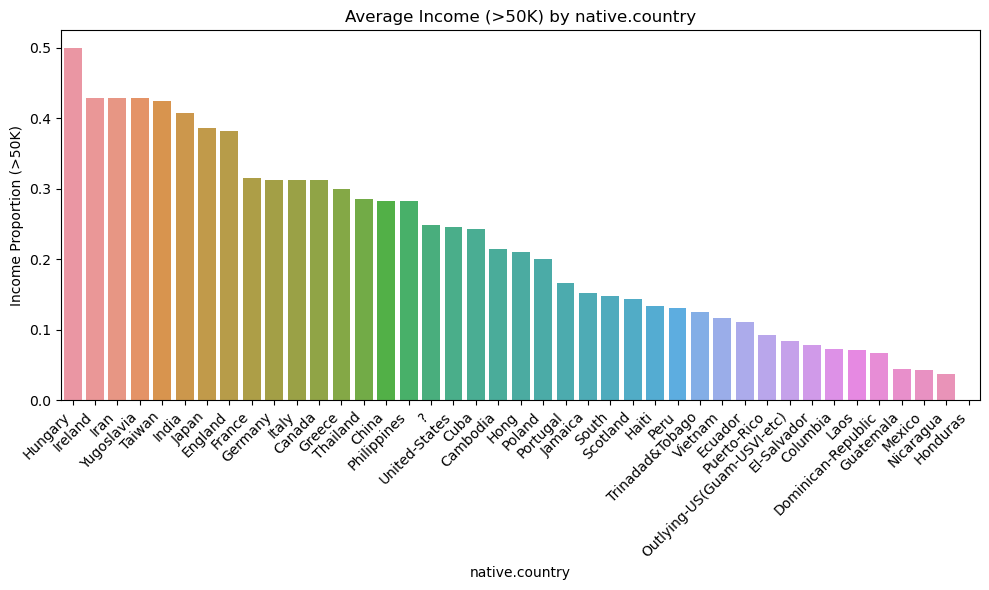

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pivot_table(feature):
    pivot = data.pivot_table(values='income>50K', index=feature, aggfunc='mean').sort_values(by='income>50K', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pivot.index, y=pivot['income>50K'])
    plt.title(f'Average Income (>50K) by {feature}')
    plt.ylabel('Income Proportion (>50K)')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()
    plt.show()

plot_pivot_table('education')

for feature in categorical_features:
    plot_pivot_table(feature)


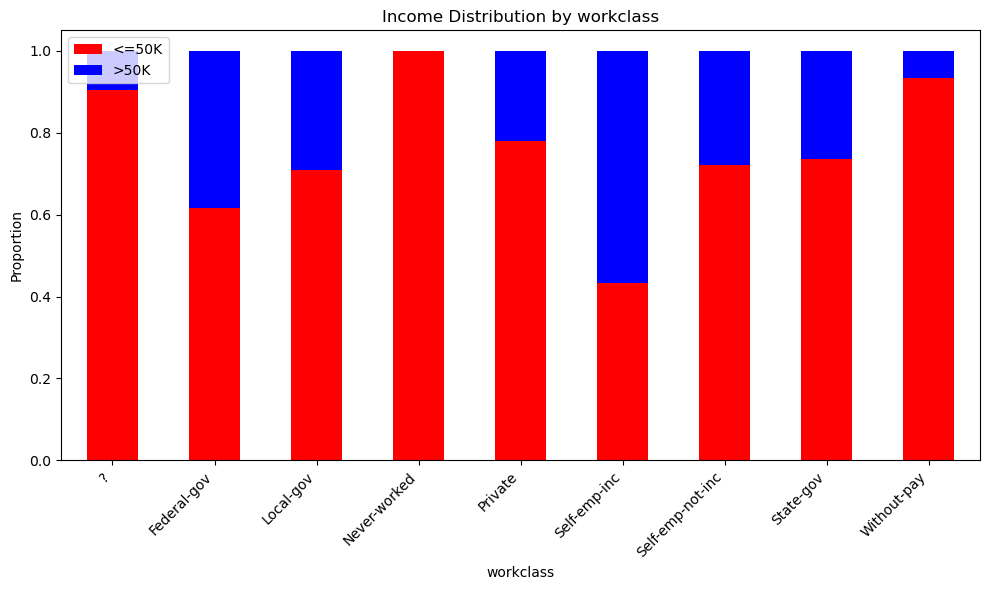

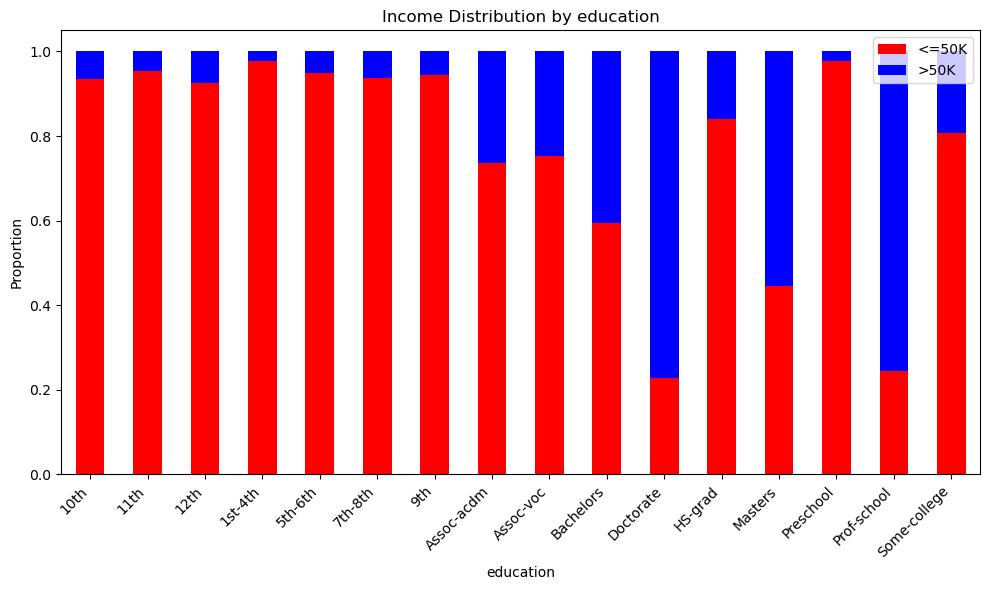

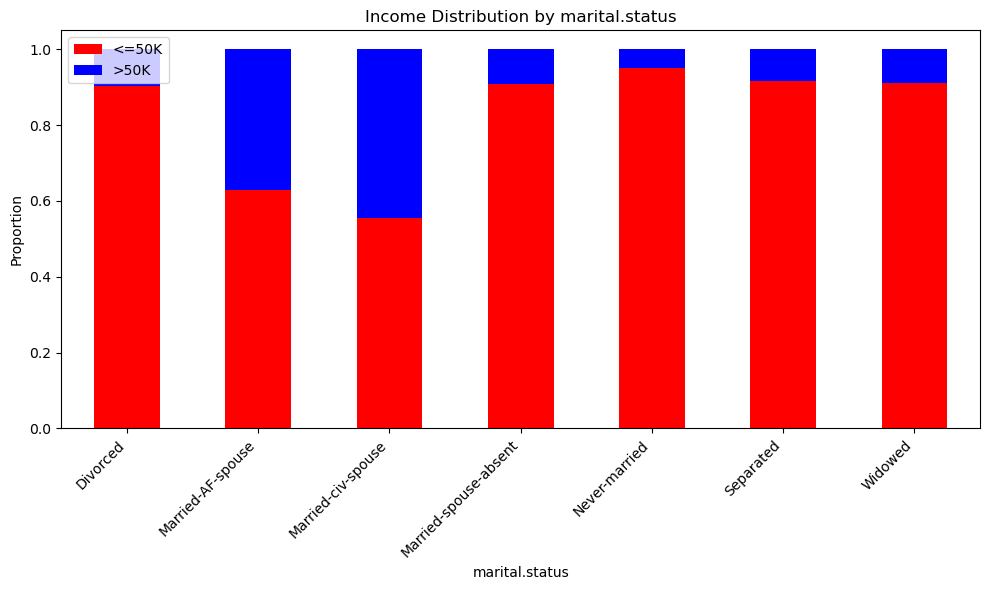

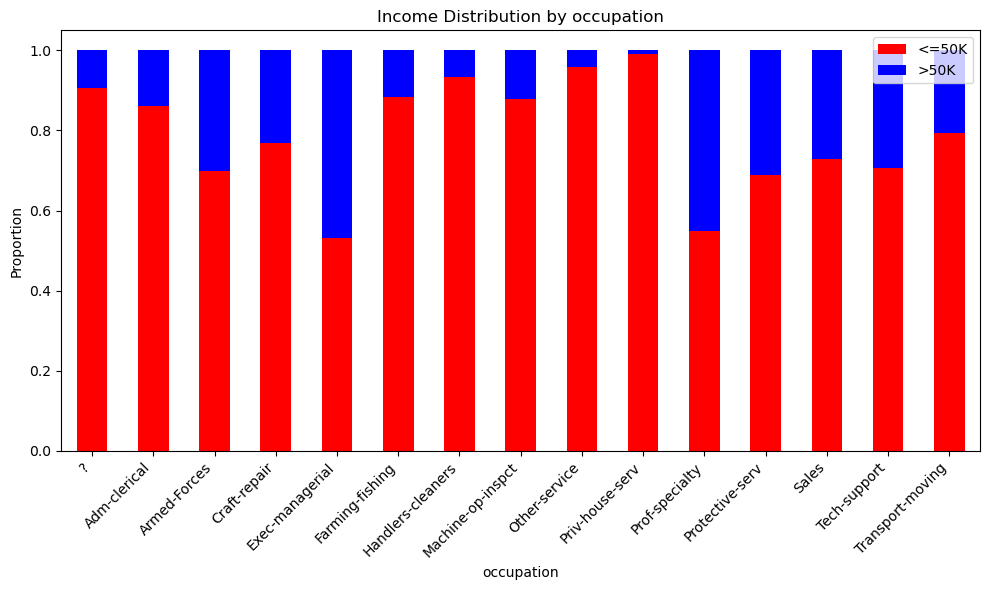

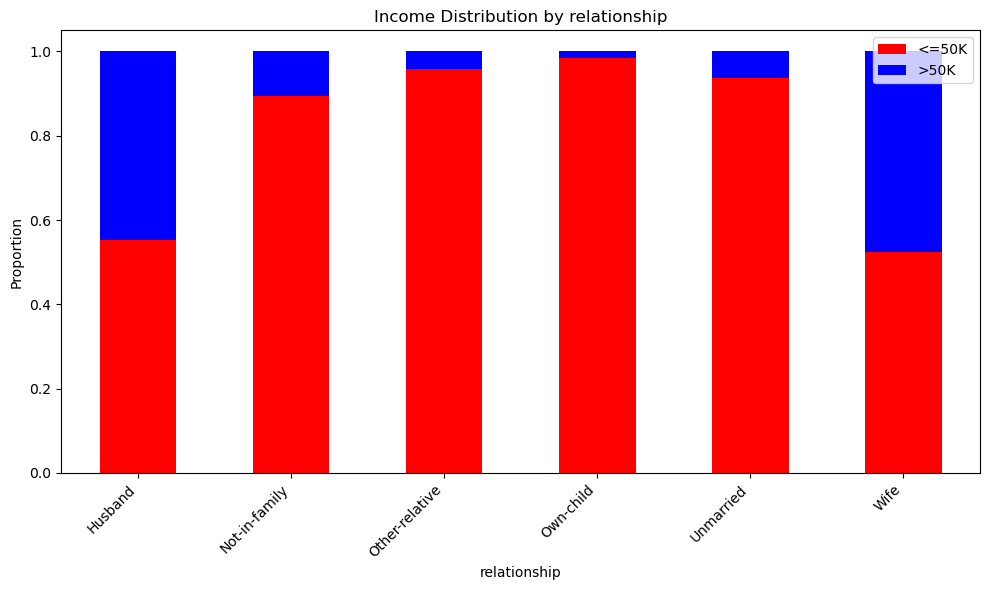

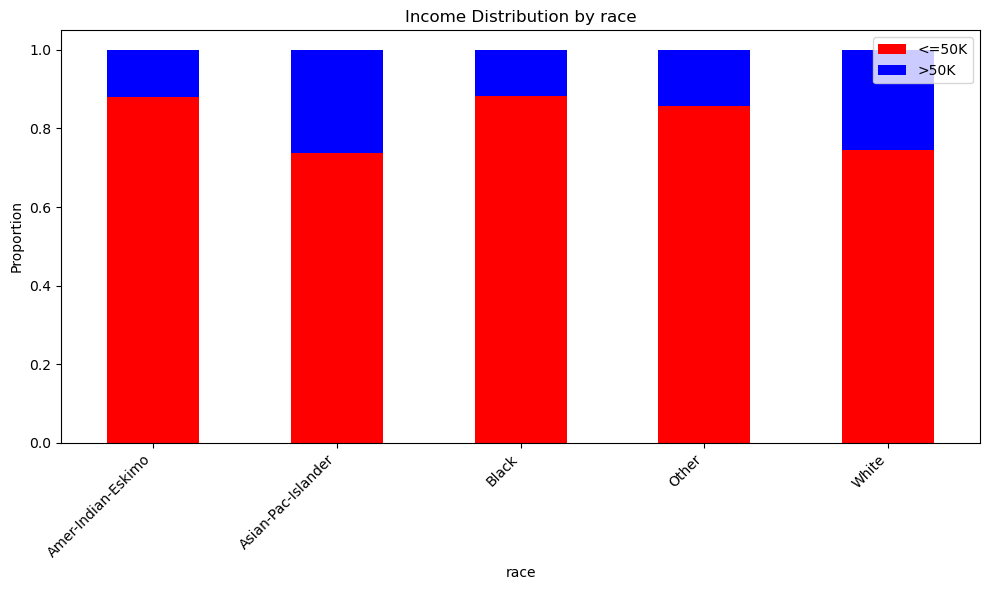

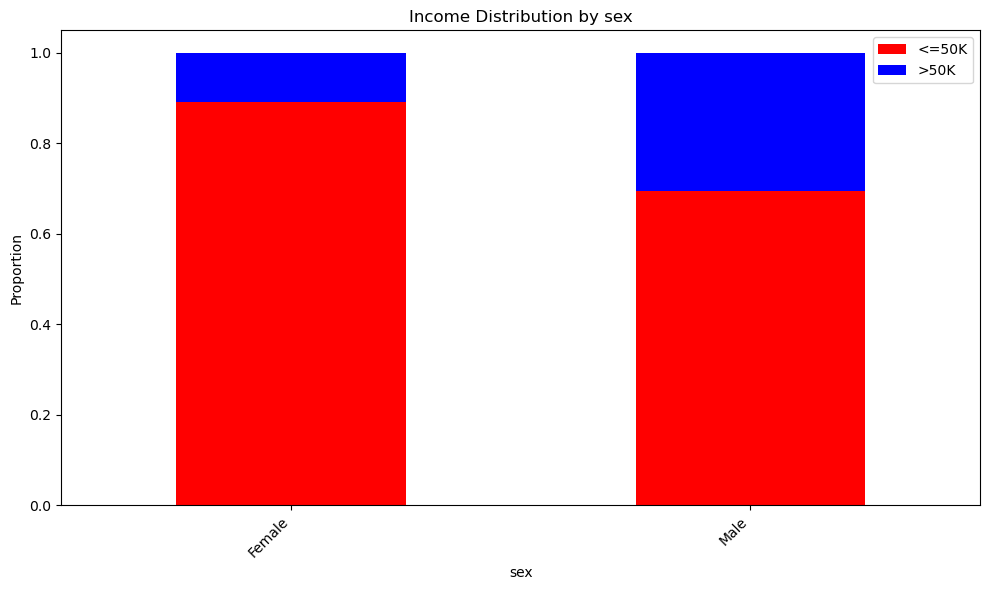

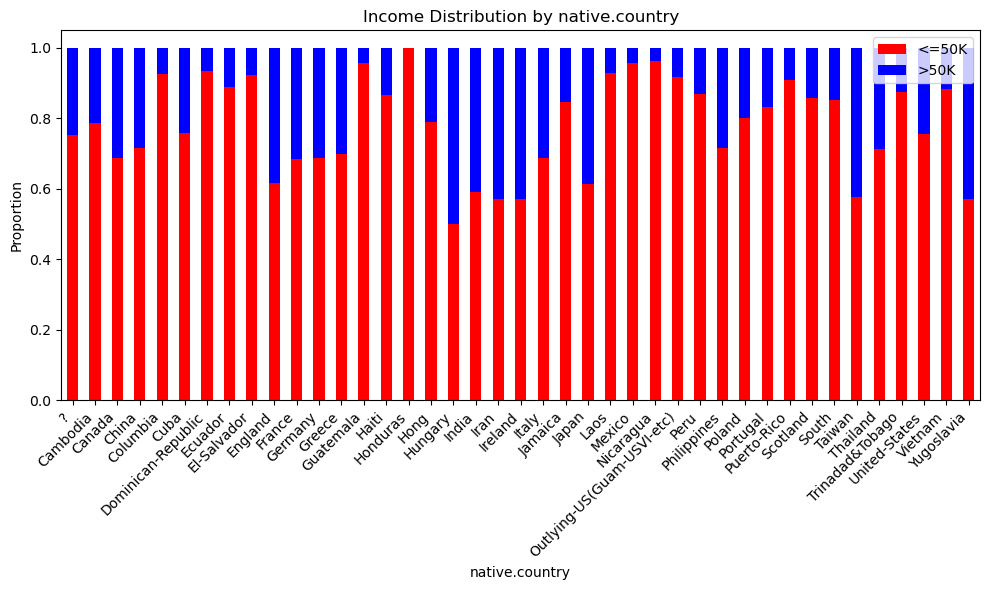

In [8]:
def plot_crosstab(feature):
    crosstab = pd.crosstab(index=data[feature], columns=data['income>50K'], normalize='index')
    crosstab.columns = ['<=50K', '>50K']
    
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'blue'])
    plt.title(f'Income Distribution by {feature}')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()
    plt.show()

for feature in categorical_features:
    plot_crosstab(feature)
